In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from functools import partial

In [2]:
all_probs = []

In [3]:
def probability_sum(prob_fun, sample_max):
    values = np.arange(0, sample_max + 1)
    probabilities = [prob_fun(n) for n in values]
    return(np.sum(probabilities).item())

In [4]:
def probability_average(prob_fun, sample_max):
    values = np.arange(0, sample_max + 1)
    probabilities = [n * prob_fun(n) for n in values]
    return(np.sum(probabilities).item())

In [5]:
# --- This dice has the advantage that the average of one roll is 1 ---
def balanced_dice(n_val):
    if n_val == 1 or n_val == 2 or n_val == 3:
        return 1.0 / 6.0
    elif n_val == 0:
        return 1.0 / 2.0
    else:
        return 0.0
all_probs.append(balanced_dice)

In [29]:
class BalancedDice:
    probabilities = {}
    probabilities[3]=4
    
    def roll(n_val):
        return f"{n_val} and {BalancedDice.probabilities}"

In [30]:
BalancedDice.roll(2)

'2 and {3: 4}'

In [6]:
# --- This dice is just an exploding balanced dice ---
def exploding_balanced_dice(n_val):
    k = n_val // 3
    if n_val % 3 == 0:
        return 1.0 / (2.0 * (6.0 ** k))
    elif n_val % 3 == 1 or n_val % 3 == 2:
        return 1.0 / (6.0 ** (k + 1))
    else:
        return 0.0
all_probs.append(exploding_balanced_dice)

In [7]:
# --- Advantage on a D20 ---
def d20_advantage(n_val):
    if n_val > 0 and n_val < 21:
        return (2.0 * n_val - 1.0) / (20.0 ** 2.0)
    return 0
all_probs.append(d20_advantage)
print(f"The total probability is {probability_sum(d20_advantage, 25)}, while the average value is {probability_average(d20_advantage, 25)}")

The total probability is 1.0, while the average value is 13.825


In [8]:
def roll_several(n_val, prob_fun, n_times):
    if n_times == 0:
        return prob_fun(n_val)
    prob_value = 0
    for x in range(0, n_val + 1):
        prob_value += prob_fun(x) * roll_several(n_val-x,prob_fun,n_times-1)
    return prob_value

In [9]:
def plot_all(prob_funs, dimension):
    values = np.arange(0, dimension + 1)
    plt.rcParams['font.family'] = 'Inter'
    plt.figure(figsize = (12,7))
    fun_counter = 1
    for prob_fun in prob_funs:
        probabilities = [prob_fun(n) for n in values]
        probabilities = np.array(probabilities)
        try:
            display_name = prob_fun.__name__ 
        except:
            display_name = f'missing function number {fun_counter}'
            fun_counter+=1
        plt.plot(values, probabilities,
                 linestyle="-",
                 marker='o',
                 color=random.choice(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'olive']),
                 label=f'Custom Discrete Function "{display_name}"')
    plt.title('Plot of Custom Discrete Probability Function $f(n)$', fontsize=18)
    plt.xlabel('Integer Value ($n$)', fontsize=14)
    plt.ylabel('Probability $f(n)$', fontsize=14)
    plt.xticks(values)
    plt.ylim(bottom=0)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    plt.tight_layout()
    plt.show()

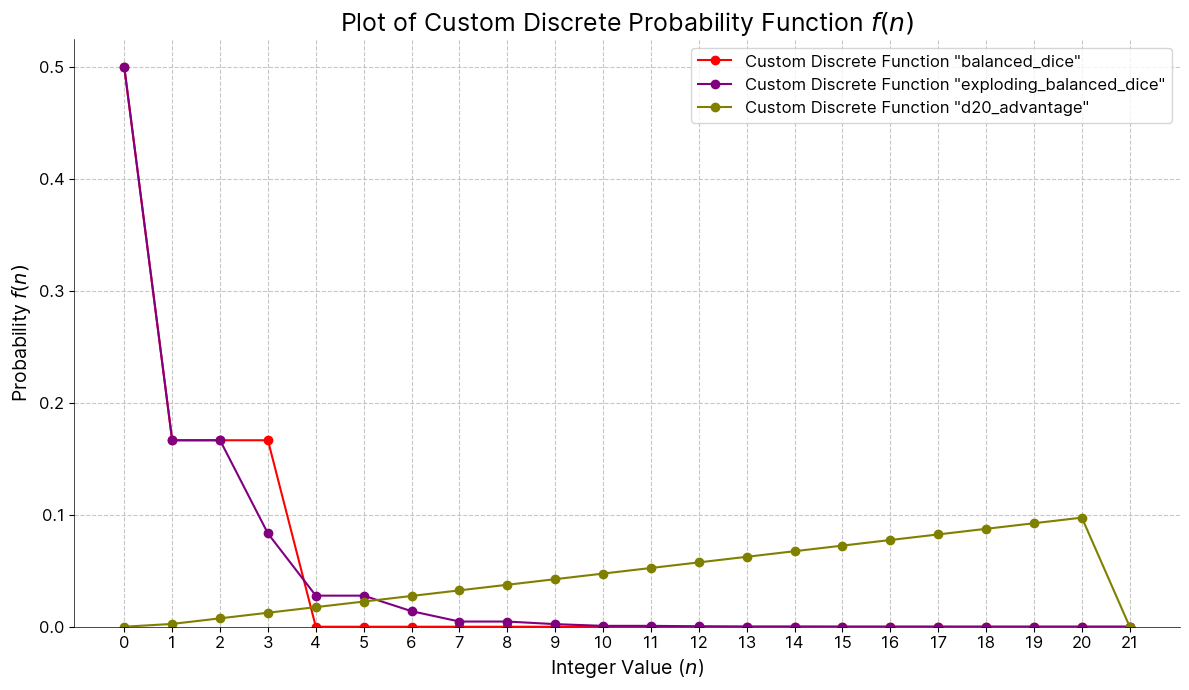

In [10]:
plot_all(all_probs, 21)

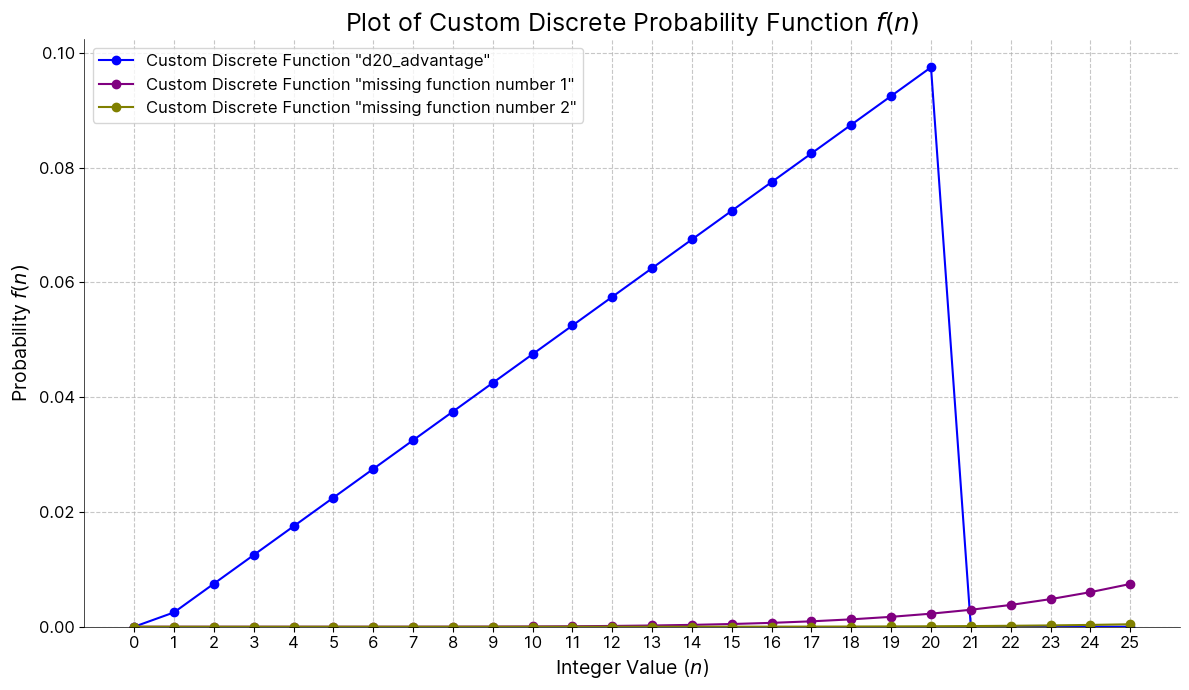

In [11]:
fun=d20_advantage
plot_all(
    [
        fun,
        partial(roll_several, prob_fun=fun, n_times=2),
        partial(roll_several, prob_fun=fun, n_times=3)
    ],
    25)

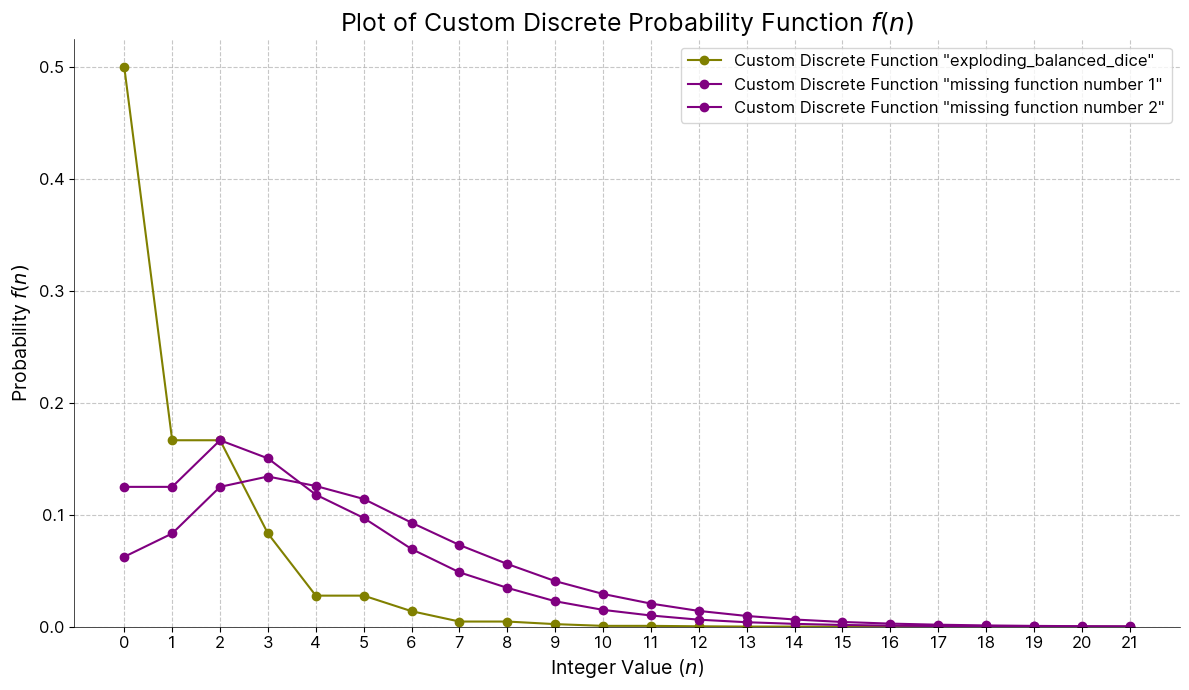

In [12]:
fun=exploding_balanced_dice
plot_all(
    [
        fun,
        partial(roll_several, prob_fun=fun, n_times=2),
        partial(roll_several, prob_fun=fun, n_times=3)
    ],
    21)